In [9]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("upvote_train.csv")
df.head(5)
# linear regression model to implement,, lasso or ridge algorithm.

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Tag = le.fit_transform(df.Tag.astype(str))

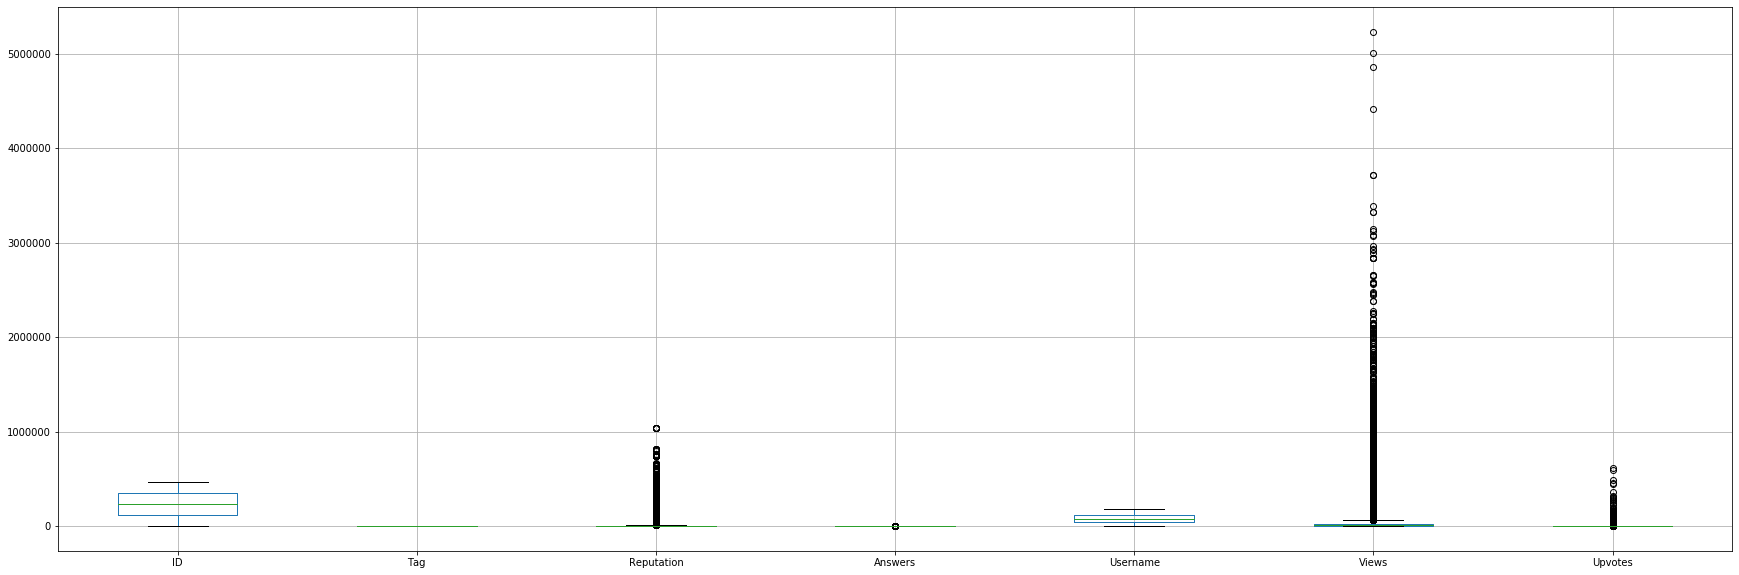

In [7]:
df.boxplot(figsize = (30,10), return_type='axes')

In [22]:
df.skew()

ID            -0.000298
Tag            0.337230
Reputation    11.230027
Answers        3.380169
Username       0.142088
Views         14.370704
Upvotes       74.249689
dtype: float64

In [23]:
df.describe()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,330045.00000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,3.54305,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.49392,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.00000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,1.00000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,4.00000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,6.00000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,9.00000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [24]:
upper_Reputation = df['Reputation'].mean() + 1.5*df['Reputation'].std()
lower_Reputation = df['Reputation'].mean() - 1.5*df['Reputation'].std()
print(lower_Reputation,upper_Reputation)

-32818.97208198559 48365.26567831336


In [25]:
df.loc[df['Reputation']> 5118.0,'Reputation'] = 5119.0

In [27]:
upper = df['Views'].mean() + 1.5*df['Views'].std()
lower = df['Views'].mean() - 1.5*df['Views'].std()
print(lower,upper)

-91789.61337571194 151079.7560592854


In [28]:
df.loc[df['Views']> 26870.0,'Views'] = 26870.0
# 2.687000e+04	

In [30]:
upper = df['Answers'].mean() + 1.5*df['Answers'].std()
lower = df['Answers'].mean() - 1.5*df['Answers'].std()
print(lower,upper)

-1.4516000900495896 9.286943755307357


In [31]:
df.loc[df['Answers']> 5.0,'Answers'] = 5.0

In [33]:
upper = df['Upvotes'].mean() + 1.5*df['Upvotes'].std()
lower = df['Upvotes'].mean() - 1.5*df['Upvotes'].std()
print(lower,upper)

-5051.156344378477 5726.167061098925


In [34]:
df.loc[df['Upvotes']> 107.0,'Upvotes'] = 107.0

In [35]:
df.skew()

ID           -0.000298
Tag           0.337230
Reputation    0.498064
Answers      -0.001231
Username      0.142088
Views         0.357091
Upvotes       0.500881
dtype: float64

In [36]:
df.corr()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
ID,1.000000,-0.004725,0.009687,0.020596,0.000628,0.031060,0.026446
Tag,-0.004725,1.000000,-0.046042,-0.085096,0.012590,-0.064239,-0.080527
Reputation,0.009687,-0.046042,1.000000,0.166561,-0.105321,0.130895,0.623223
Answers,0.020596,-0.085096,0.166561,1.000000,-0.010254,0.516477,0.408982
Username,0.000628,0.012590,-0.105321,-0.010254,1.000000,0.004202,-0.061682
Views,0.031060,-0.064239,0.130895,0.516477,0.004202,1.000000,0.606137
Upvotes,0.026446,-0.080527,0.623223,0.408982,-0.061682,0.606137,1.000000


In [37]:
x = df.iloc[:,1:6]
y = df.iloc[:,-1]

In [38]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression()

In [39]:
y_pred = lm.predict(x)

In [40]:
df['Predections'] = y_pred

In [41]:
from sklearn import metrics
MSE_ln = metrics.mean_squared_error(y,y_pred)
MSE_ln

578.3952613362331

In [42]:
error = y - y_pred
error_ln = np.abs(error)

In [43]:
MAPE_ln = np.mean(error_ln/y_pred)*100
MAPE_ln

58.213367942428775

In [44]:
acc = 100 - MAPE_ln
acc

41.786632057571225

In [45]:
lm_r2 = lm.score(x,y)
lm_r2

0.6710673284824609

In [46]:
adj_r2 = 1 - (1-lm.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
adj_r2

0.6710623452430329

In [60]:
df

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Predections
0,52664,0,3942.0,2.0,155623,7855.0,42.0,55.919648
1,327662,0,5119.0,5.0,21781,26870.0,107.0,113.070615
2,468453,1,1358.0,4.0,56177,8067.0,60.0,30.673491
3,96996,0,264.0,3.0,168793,26870.0,9.0,55.030881
4,131465,1,4271.0,4.0,112223,13986.0,83.0,75.059600
...,...,...,...,...,...,...,...,...
330040,339800,1,36.0,2.0,84919,1063.0,0.0,-1.588501
330041,253800,1,1649.0,2.0,76730,23319.0,73.0,61.870034
330042,210756,1,5119.0,2.0,91701,2453.0,15.0,58.058976
330043,56089,4,89.0,2.0,80245,2107.0,3.0,0.239850


In [61]:
df_main = pd.read_csv("upvote_test.csv")
df_main

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
...,...,...,...,...,...,...
141443,47187,j,4681.0,4.0,152060,2469.0
141444,329126,j,7782.0,3.0,89235,18998.0
141445,282334,p,435.0,5.0,119788,57048.0
141446,386629,o,176.0,3.0,86824,10193.0


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_main.Tag = le.fit_transform(df_main.Tag.astype(str))

In [64]:
upper_Reputation = df_main['Reputation'].mean() + 1.5*df_main['Reputation'].std()
lower_Reputation = df_main['Reputation'].mean() - 1.5*df_main['Reputation'].std()
print(lower_Reputation,upper_Reputation)

-33945.15996140823 49787.01442382551


In [65]:
df_main.loc[df_main['Reputation']> 5118.0,'Reputation'] = 5119.0

In [66]:
upper = df_main['Views'].mean() + 1.5*df_main['Views'].std()
lower = df_main['Views'].mean() - 1.5*df_main['Views'].std()
print(lower,upper)

-90669.27713743132 150361.94336106122


In [67]:
df_main.loc[df_main['Views']> 26870.0,'Views'] = 26870.0

In [68]:
upper = df_main['Answers'].mean() + 1.5*df_main['Answers'].std()
lower = df_main['Answers'].mean() - 1.5*df_main['Answers'].std()
print(lower,upper)

-1.4513169236862304 9.281063544352483


In [69]:
df_main.loc[df_main['Answers']> 5.0,'Answers'] = 5.0

In [71]:
x_ = df_main.iloc[:,1:6]
x_

,Tag,Reputation,Answers,Username,Views
0,0,5119.0,3.0,50652,26870.0
1,1,5119.0,5.0,37685,2730.0
2,3,927.0,1.0,135293,21167.0
3,3,21.0,5.0,166998,18528.0
4,3,4475.0,5.0,53504,26870.0
...,...,...,...,...,...
141443,4,4681.0,4.0,152060,2469.0
141444,4,5119.0,3.0,89235,18998.0
141445,6,435.0,5.0,119788,26870.0
141446,5,176.0,3.0,86824,10193.0


In [72]:
y_ = lm.predict(x_)
y_

array([109.87407982,  63.46831365,  46.99459433, ...,  58.40348552,
        18.8966151 ,  29.38238744])

In [73]:
df_main['Upvotes'] = abs(y_)

In [74]:
df_main

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,366953,0,5119.0,3.0,50652,26870.0,109.874080
1,71864,1,5119.0,5.0,37685,2730.0,63.468314
2,141692,3,927.0,1.0,135293,21167.0,46.994594
3,316833,3,21.0,5.0,166998,18528.0,37.459288
4,440445,3,4475.0,5.0,53504,26870.0,104.806473
...,...,...,...,...,...,...,...
141443,47187,4,4681.0,4.0,152060,2469.0,55.060828
141444,329126,4,5119.0,3.0,89235,18998.0,92.423495
141445,282334,6,435.0,5.0,119788,26870.0,58.403486
141446,386629,5,176.0,3.0,86824,10193.0,18.896615


In [75]:
sample = df_main[["ID","Upvotes"]]
sample = sample[["ID","Upvotes"]].apply(np.floor)
sample

,ID,Upvotes
0,366953.0,109.0
1,71864.0,63.0
2,141692.0,46.0
3,316833.0,37.0
4,440445.0,104.0
...,...,...
141443,47187.0,55.0
141444,329126.0,92.0
141445,282334.0,58.0
141446,386629.0,18.0


In [76]:
asc = sample.sort_values(by=['ID'], ascending=True)

In [77]:
asc.to_csv("sample_output.csv", index=False)